# 1: Data exploration

#### Import needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


#### our task is a random representative sample data so when imputing the correlation and other variance this has to be in mind

#### our task is a supervised task the y-predict has to be the "suscribers" column and we need to know what exactly does it affect the number of subscribers the most

### 1.1:

In [2]:
df=pd.read_csv('youtubers_df.csv')

In [3]:
df.shape

(1000, 9)

In [4]:
df.dtypes

Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [5]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


####  1.2 :check messing values

In [6]:
NA_Count = pd.DataFrame({'Sum of NA':df.isnull().sum()}).sort_values(by=['Sum of NA'],ascending=[0])
NA_Count['Percentage'] = NA_Count['Sum of NA']

In [7]:
sum(NA_Count['Percentage'])

306

In [8]:
print(df.isnull().sum())

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


In [9]:
df.Categories.describe()

count                694
unique                45
top       Música y baile
freq                 160
Name: Categories, dtype: object

#### we see that the missing values are object type so we can delete the whole row


In [10]:
df['Categories'].unique()

array(['Música y baile', 'Videojuegos, Humor', 'Educación', nan,
       'Animación, Juguetes', 'Películas, Videojuegos', 'Juguetes',
       'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor',
       'Música y baile, Animación', 'Música y baile, Películas',
       'Películas, Juguetes', 'Películas, Humor', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos', 'Animación',
       'Música y baile, Humor', 'Diseño/arte, DIY y Life Hacks',
       'Ciencia y tecnología', 'Fitness, Salud y autoayuda',
       'Belleza, Moda', 'Humor', 'Comida y bebida', 'Deportes', 'Fitness',
       'Viajes, Espectáculos', 'Comida y bebida, Salud y autoayuda',
       'Diseño/arte', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes',
       'Juguetes, Coches y vehículos', 'Música y baile, Juguetes',
       'Animales y mascotas', 'ASMR', 'Moda', 'DIY y Life Hacks',
       'Diseño/arte, Belleza', 'Coches y vehículos',
       'Animación, Humor

In [11]:
df['Categories'].nunique()

45

In [12]:
df['Country'].unique()

array(['India', 'Estados Unidos', 'Unknown', 'Brasil', 'México', 'Rusia',
       'Pakistán', 'Filipinas', 'Indonesia', 'Tailandia', 'Francia',
       'Colombia', 'Iraq', 'Japón', 'Ecuador', 'Argentina', 'Turquía',
       'Arabia Saudita', 'El Salvador', 'Bangladesh', 'Reino Unido',
       'Argelia', 'España', 'Perú', 'Egipto', 'Jordania', 'Marruecos',
       'Singapur', 'Somalia'], dtype=object)

In [13]:
df['Country'].nunique()

29

### dropping the rows with null values since we cant impute them

In [14]:
df=df.dropna()

In [15]:
df.shape

(694, 9)

In [16]:
del df['Links']

In [17]:
df.shape

(694, 8)

# 2: Trend analysis

#### 2.1: sorting the df based on the number of subscribers in descending order

In [18]:
df = df.sort_values('Suscribers', ascending=False)

##### Select the top categories and subscribers

In [19]:
top_Categories = df['Categories'].head(10)
top_subscribers = df['Suscribers'].head(10)

In [20]:
df.head(10)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0
10,11,BLACKPINK,Música y baile,91300000.0,Estados Unidos,863200.0,146900.0,3400.0


##### Plot the data using a bar chart

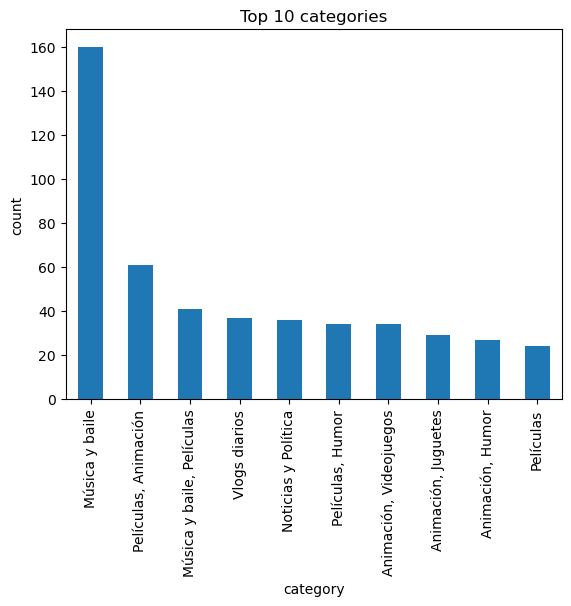

In [21]:
categories = df["Categories"].value_counts().head(10)
categories.plot(kind = "bar")
plt.xlabel("category")
plt.ylabel("count")
plt.title("Top 10 categories")
plt.show()

In [22]:
df['Categories'] = df['Categories'].astype('category')
df.describe(include='category')

,Categories
count,694
unique,45
top,Música y baile
freq,160


##### 2.2 finding correlation between number of subscribers and number of likes and comments

            Suscribers    Visits     Likes  Comments
Suscribers    1.000000  0.286039  0.248389  0.037293
Visits        0.286039  1.000000  0.966643  0.319666
Likes         0.248389  0.966643  1.000000  0.311424
Comments      0.037293  0.319666  0.311424  1.000000


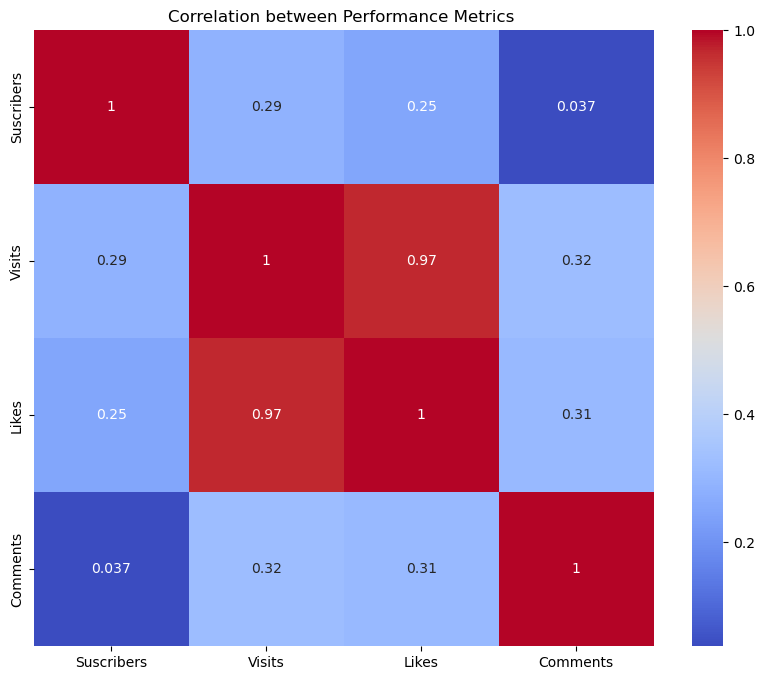

In [23]:
correlation = df[['Suscribers', 'Visits', 'Likes', 'Comments']].corr()
print(correlation)

# Visualize the correlation using a heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation between Performance Metrics ')
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

##### As we can see there is a positive correlation but not so high so number of comments and likes doesn't tell that this channel has a high number of subscribers

# 3 :  Audiance Study

In [24]:
countrycount = df["Country"].value_counts()
countrycount

Estados Unidos    226
Unknown           136
India             112
Brasil             51
México             42
Indonesia          31
Rusia              22
Colombia           14
Filipinas          10
Tailandia           9
Pakistán            6
Argentina           5
Bangladesh          3
España              3
Reino Unido         3
Turquía             3
Arabia Saudita      3
Iraq                2
Perú                2
Francia             2
Egipto              2
Marruecos           2
Jordania            1
Singapur            1
Argelia             1
Japón               1
Somalia             1
Name: Country, dtype: int64

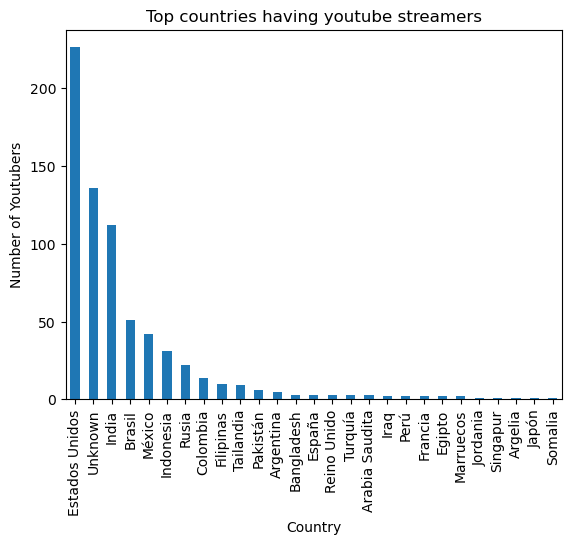

In [25]:
countrycount.plot(kind = "bar")
plt.xlabel("Country")
plt.ylabel("Number of Youtubers")
plt.title("Top countries having youtube streamers")
plt.show()

# 4- Performance metrics

##### 4.1 : calculating the average number of subscribers , visits , likes , and comments

In [26]:
from statistics import mean , median , mode
avgsubscribers=mean(df['Suscribers'])
print(avgsubscribers)

22415561.95965418


In [27]:
avgvisits=mean(df['Visits'])
print(avgvisits)

1210729.6829971182


In [28]:
avgLikes=mean(df['Likes'])
print(avgLikes)

53473.59798270893


In [29]:
avgcomments=mean(df['Comments'])
print(avgcomments)

1558.793948126801


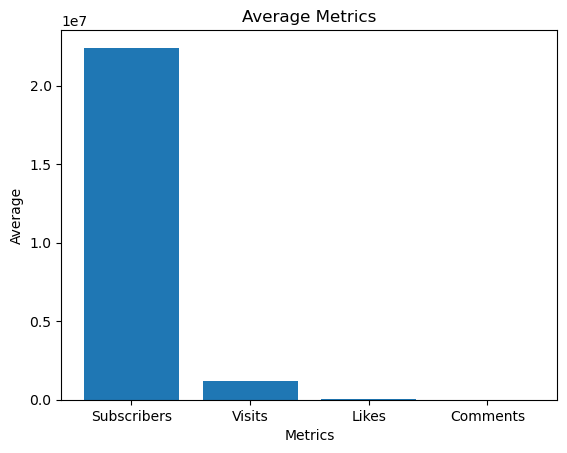

In [30]:
metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']
averages = [avgsubscribers, avgvisits, avgLikes, avgcomments]

plt.bar(metrics, averages)
plt.xlabel('Metrics')
plt.ylabel('Average')
plt.title('Average Metrics')
plt.show()

##### 4.2 : from what we see the number of subscribers doesn't mean that the number of interactions or visits are high and we understood this before from the correlation also

# 5 - finding the top category that has the most streamers "i already imputed  this before but im visualizing it"

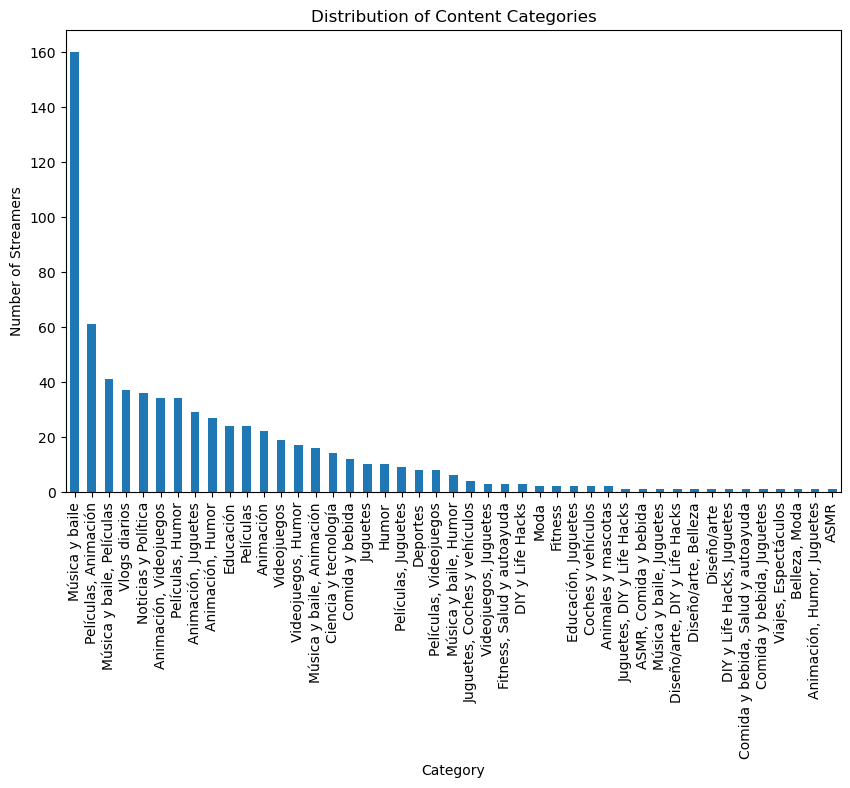

In [31]:
category_counts = df['Categories'].value_counts()

# Plot the distribution of content categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Streamers')
plt.title('Distribution of Content Categories')
plt.show()

# 6: brands and collaboration

#### grouping the data by categories first then calculating the average likes for each category after that we could know so the answer is yes streamers with high performance metrics can recieve more brand collaboration "had a little help in this task"

Categories
Videojuegos, Humor                    420511.764706
Vlogs diarios                         187244.945946
Humor                                 169990.000000
Diseño/arte, Belleza                  152400.000000
Animación, Humor                      145768.333333
Comida y bebida                       128664.750000
Diseño/arte, DIY y Life Hacks         127300.000000
Animales y mascotas                   102750.000000
Animación, Videojuegos                 79294.029412
Belleza, Moda                          62300.000000
Ciencia y tecnología                   59283.142857
Videojuegos                            57121.052632
Películas, Videojuegos                 48083.375000
Música y baile, Humor                  45783.333333
Educación                              45060.750000
Deportes                               44949.000000
Películas, Humor                       40684.617647
DIY y Life Hacks, Juguetes             33200.000000
Películas                              28829.208333
P

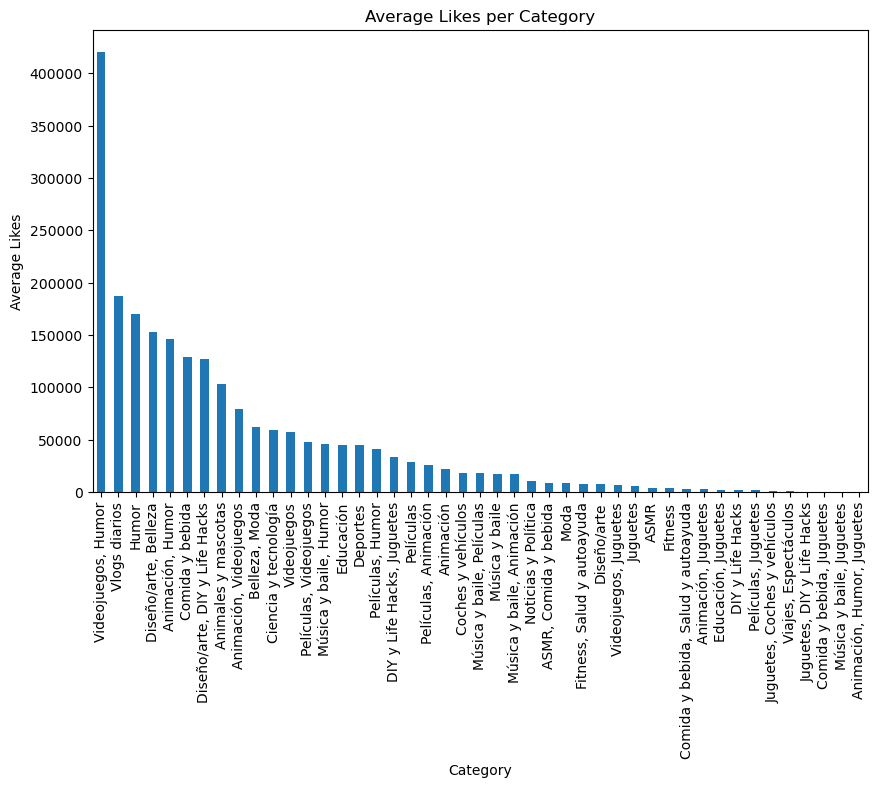

In [32]:
# Group the data by category and calculate the average number of marketing campaigns
campaigns_by_category = df.groupby('Categories')['Likes'].mean().sort_values(ascending=False)
print(campaigns_by_category)

# Visualize the average number of marketing campaigns by category
plt.figure(figsize=(10, 6))
plt.title('Average Likes per Category')
campaigns_by_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average Likes')
plt.show()

# 7 : benchmarking

#### as we calculated the average before we will use it to see what streamers has a total of above average performance

In [33]:
top_streamers = df[(df['Suscribers'] > avgsubscribers) & (df['Visits'] > avgvisits) & (df['Likes'] > avgLikes) & (df['Comments'] > avgcomments)]

##### sort them from the highest to lowest

In [34]:
top_streamers_sorted = top_streamers.sort_values('Suscribers', ascending=False)

In [35]:
print(top_streamers_sorted[['Rank', 'Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])

     Rank              Username   Suscribers       Visits      Likes  Comments
1       2               MrBeast  183500000.0  117400000.0  5300000.0   18500.0
5       6             PewDiePie  111500000.0    2400000.0   197300.0    4900.0
26     27           dudeperfect   59700000.0    5300000.0   156500.0    4200.0
34     35           TaylorSwift   54100000.0    4300000.0   300400.0   15000.0
39     40           JuegaGerman   48600000.0    2000000.0   117100.0    3000.0
43     44              A4a4a4a4   47300000.0    9700000.0   330400.0   22000.0
58     59             Mikecrack   43400000.0    2200000.0   183400.0    1800.0
62     63        KimberlyLoaiza   42100000.0    5300000.0   271300.0   16000.0
70     71           JessNoLimit   39600000.0    1300000.0    73500.0    1600.0
96     97        TotalGaming093   36300000.0    1500000.0   129400.0    4900.0
100   101            markiplier   35500000.0    2100000.0   126500.0    3800.0
122   123               AboFlah   32700000.0    3300

# 8 - proposing a system

#### to propose a system to recommend content to youtube user we might have to think to fill a form of expeacted interactions , subscirbers , visits required and take this information then recommend content accourding to the input

### this can be done either by imputing it manually with conditions or using a machine / deep learning model

In [36]:
desired_category = input("Enter the desired  category: ")
min_subscribers = int(input("Enter the min no of subscribers: "))
min_visits = int(input("Enter the min no  of visits: "))
min_likes = int(input("Enter the min no  of likes: "))
min_comments = int(input("Enter the min no  of comments: "))
filtered_data = df[
    (df['Categories'] == desired_category) &
    (df['Suscribers'] >= min_subscribers) &
    (df['Visits'] >= min_visits) &
    (df['Likes'] >= min_likes) &
    (df['Comments'] >= min_comments)]

In [37]:
### sort subscribers by descending order

recommended_content = filtered_data.sort_values('Suscribers', ascending=False)
print(recommended_content[['Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])

          Username   Suscribers       Visits      Likes  Comments
1          MrBeast  183500000.0  117400000.0  5300000.0   18500.0
179    brentrivera   27600000.0    6400000.0   154100.0    5000.0
234            rug   24300000.0    3200000.0    85300.0    5100.0
278    StokesTwins   22700000.0   11700000.0   235000.0   10000.0
285     BenAzelart   22500000.0    3700000.0    44900.0    2700.0
304       infinite   21700000.0     884800.0    45700.0    1400.0
343     IShowSpeed   20300000.0    2500000.0   101600.0    5000.0
376        Sidemen   19500000.0    9200000.0   284800.0    8200.0
467   TheBrianMaps   17400000.0    5100000.0   390700.0   11000.0
673     TommyInnit   14600000.0    1400000.0    99000.0    4900.0
660  rebeccazamolo   14600000.0    2900000.0    30400.0    2600.0
696        airrack   14200000.0    4400000.0   192700.0    6400.0
